# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


Performing some Exploratory Data Analysis and Feature Engineering.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Importing Libraries and Define Auxiliary Functions


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("datasets/dataset_part_2.csv")
# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code> and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


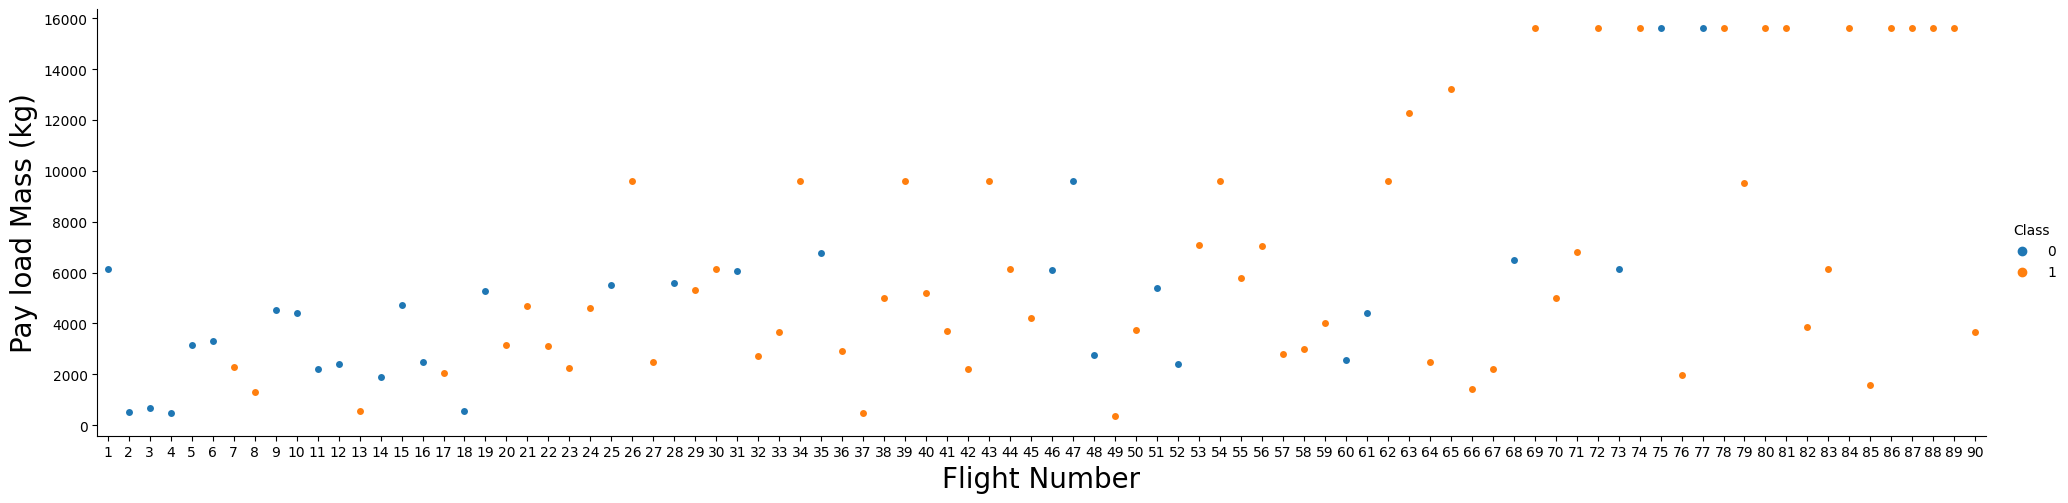

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

#### Observation: 
* Payload mass is low for the first flight and somewhat increases as the flight number increases
* the failures are high when flight number is low and it decreases as the flight number increases

### TASK 1: Visualizing the relationship between Flight Number and Launch Site


Using the seaborn function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, setting the  parameter <code>x</code>  parameter to <code>FlightNumber</code>, <code>y</code> to <code>Launch Site</code> and <code>hue</code> to <code>'class'</code>


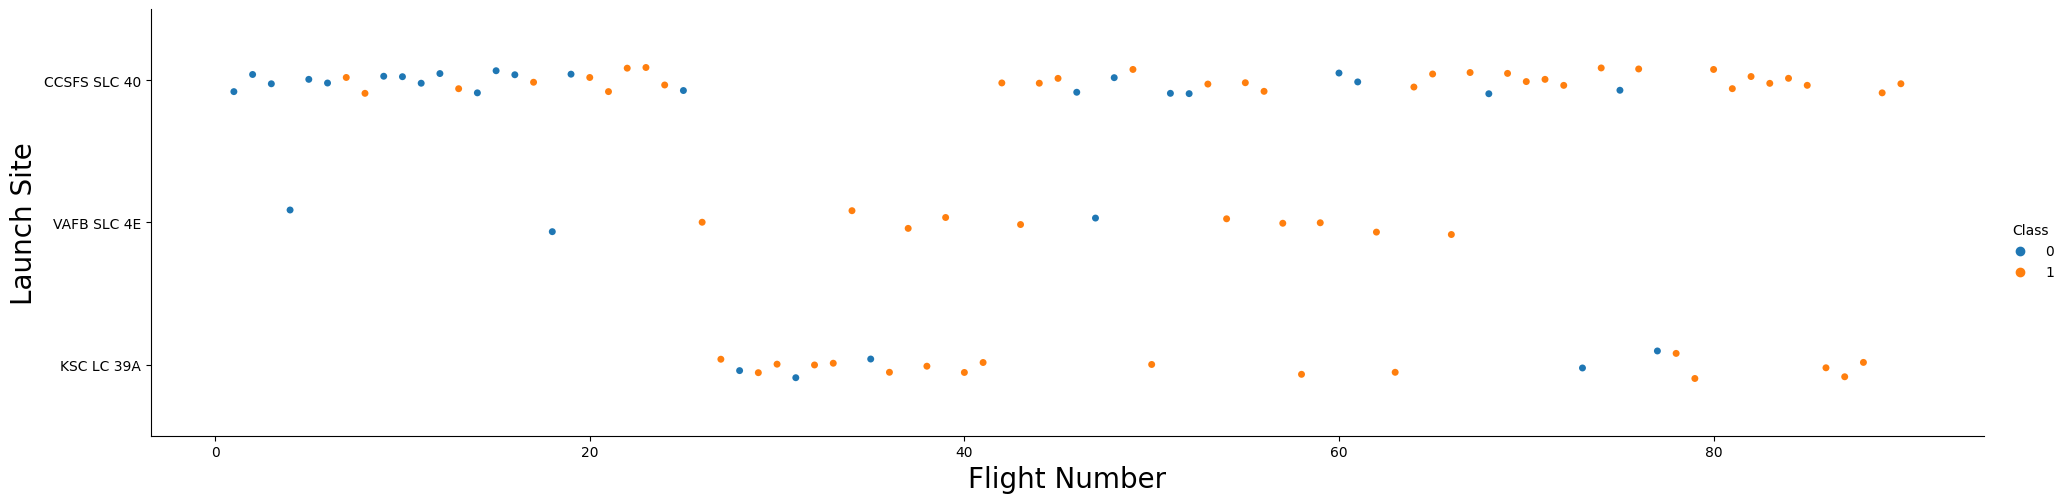

In [5]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  
* <code> CCAFS LC-40</code> has lower success rate than other two as it failed a lot during initial flights
* <code > KSC LC-39A </code > and <code > VAFB SLC 4E </code > have almost same success rate, and they have a relatively higher flight number so failure rate is low


### TASK 2: Visualizing the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


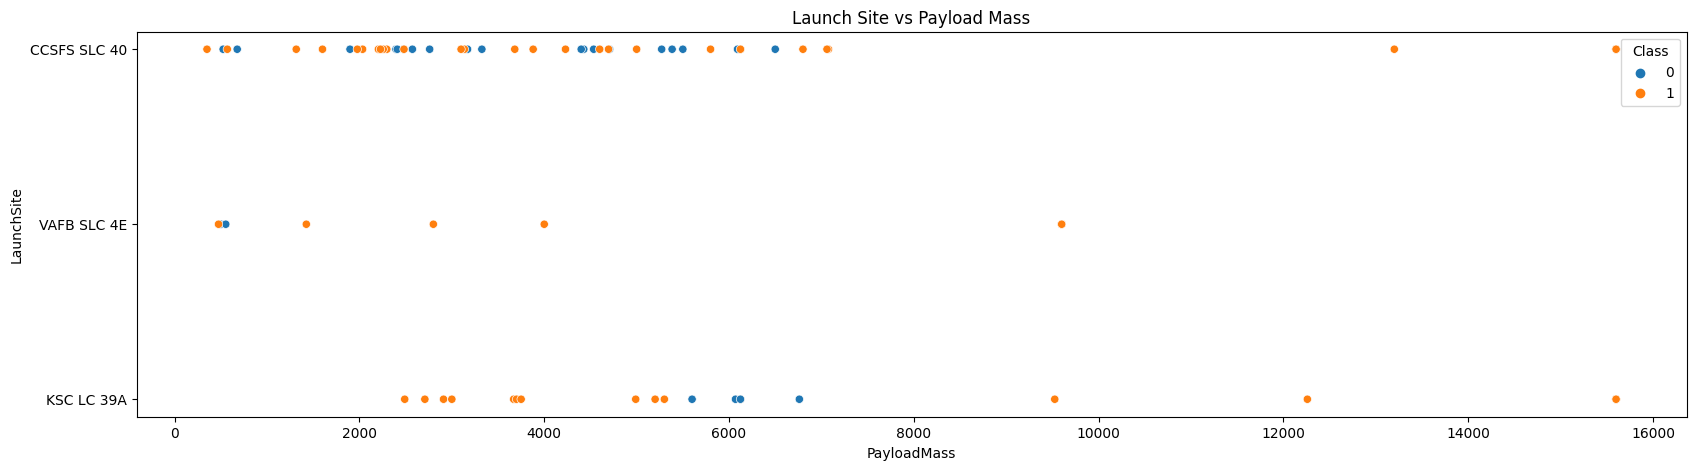

In [6]:
g= sns.scatterplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, legend='full').set_title("Launch Site vs Payload Mass")
g.figure.set_figwidth(20)
g.figure.set_figheight(5)
plt.show()


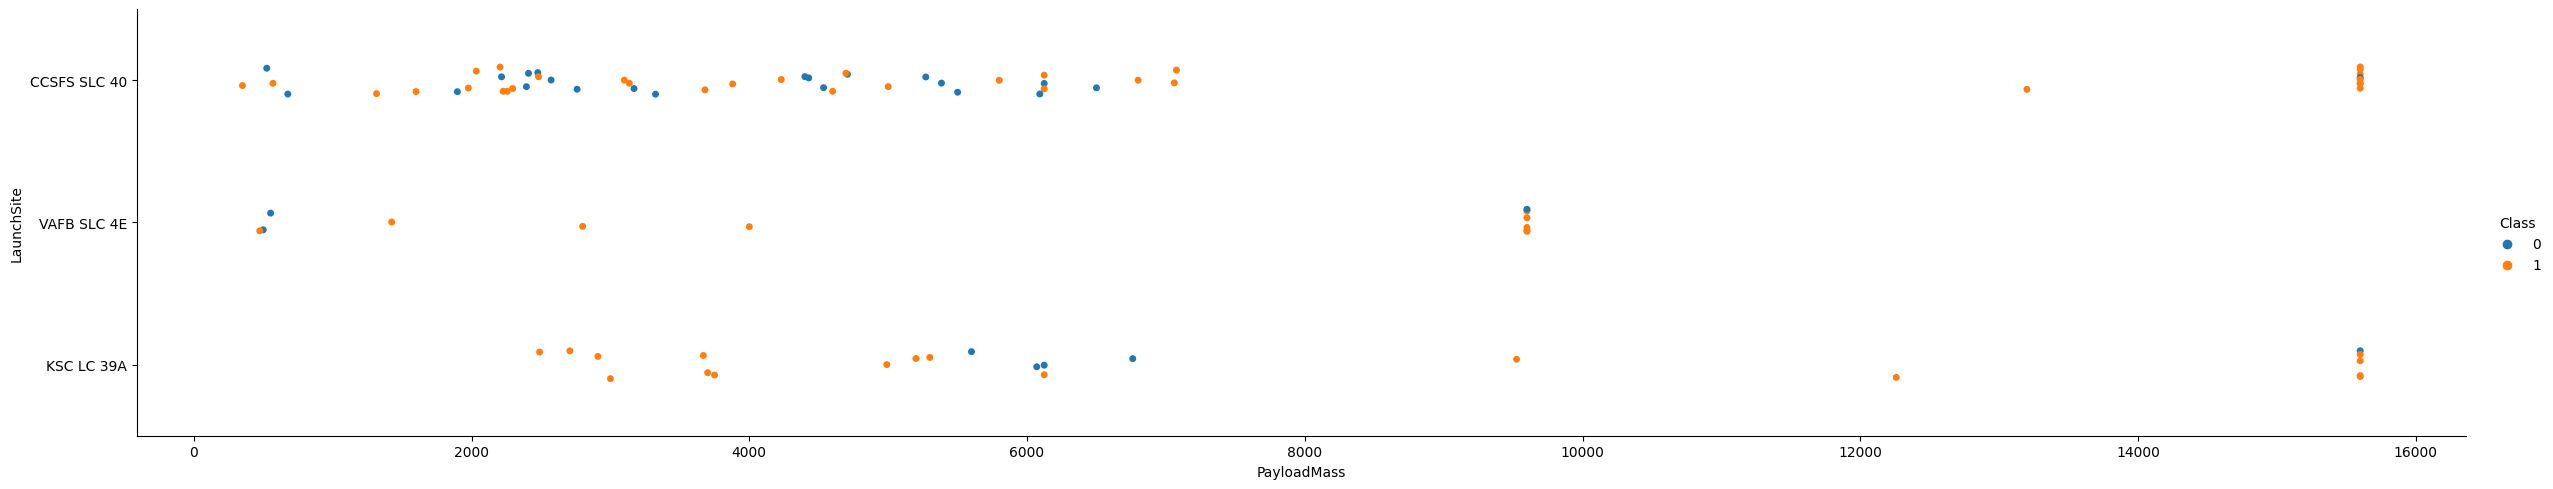

In [7]:
#can also use this
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.show()


#### Observation:
* Payload Vs. Launch Site scatter point chart we will find  that there are no rockets launched for heavypayload mass(greater than 10000) for the VAFB-SLC launchsite 


### TASK  3: Visualizing the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


We can create a `bar-chart` for the sucess rate of each orbit


In [8]:
df[['Orbit','Class']].head()

,Orbit,Class
0,LEO,0
1,LEO,0
2,ISS,0
3,PO,0
4,GTO,0


We need to group the orbit type and the success rate so that we can plot the bar chart.

In [9]:
dfg= df[['Orbit','Class']].groupby(['Orbit'],as_index=False).mean()
dfg

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


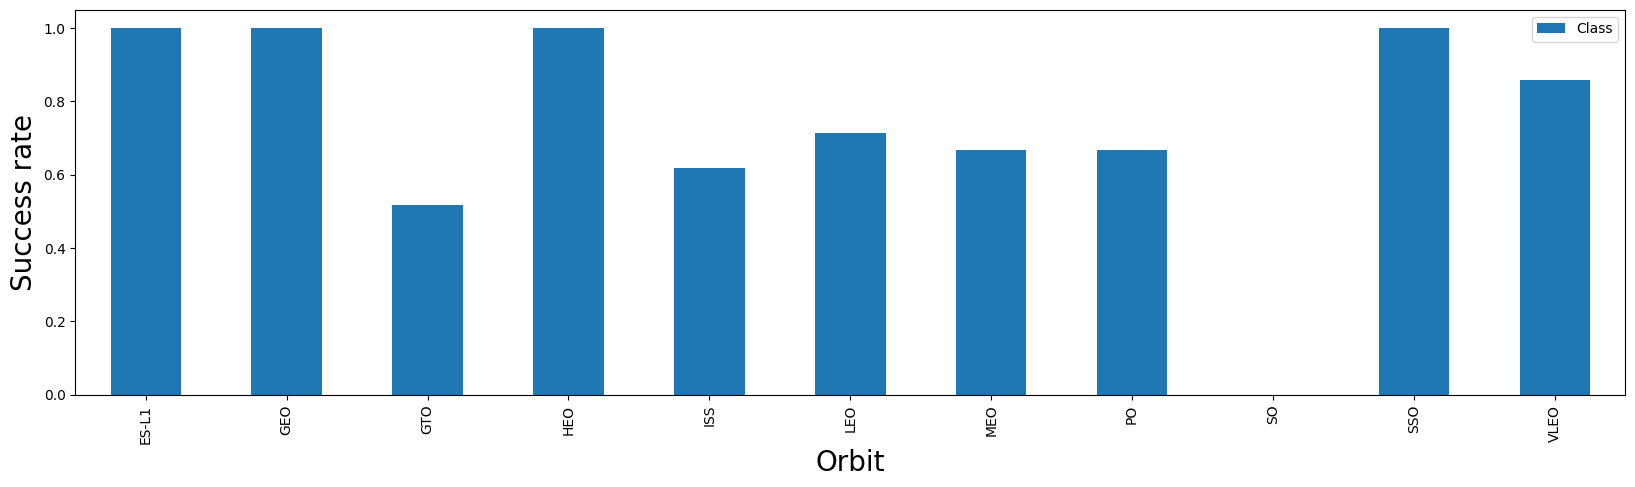

In [10]:
#plotting now
dfg.plot(kind='bar', x='Orbit', y='Class', figsize=(20, 5))
plt.xlabel("Orbit", fontsize=20)
plt.ylabel("Success rate", fontsize=20)
plt.show()

Counting the no of launches to orbit to analyze better:

In [11]:
df['Orbit'].groupby(df['Orbit']).count()

Orbit
ES-L1     1
GEO       1
GTO      27
HEO       1
ISS      21
LEO       7
MEO       3
PO        9
SO        1
SSO       5
VLEO     14
Name: Orbit, dtype: int64

#### Observations: 
as we can see from the bar chart, and the number of launches.
* GEO, HEO, ES-L1, SSO have 1 launches and 100% success rate
* SO has 1 launch and 0% succes rate
* ISS has 21 launches 61% success rate
* VLEO has 14 launches and 85% success rate

### TASK  4: Visualizing the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


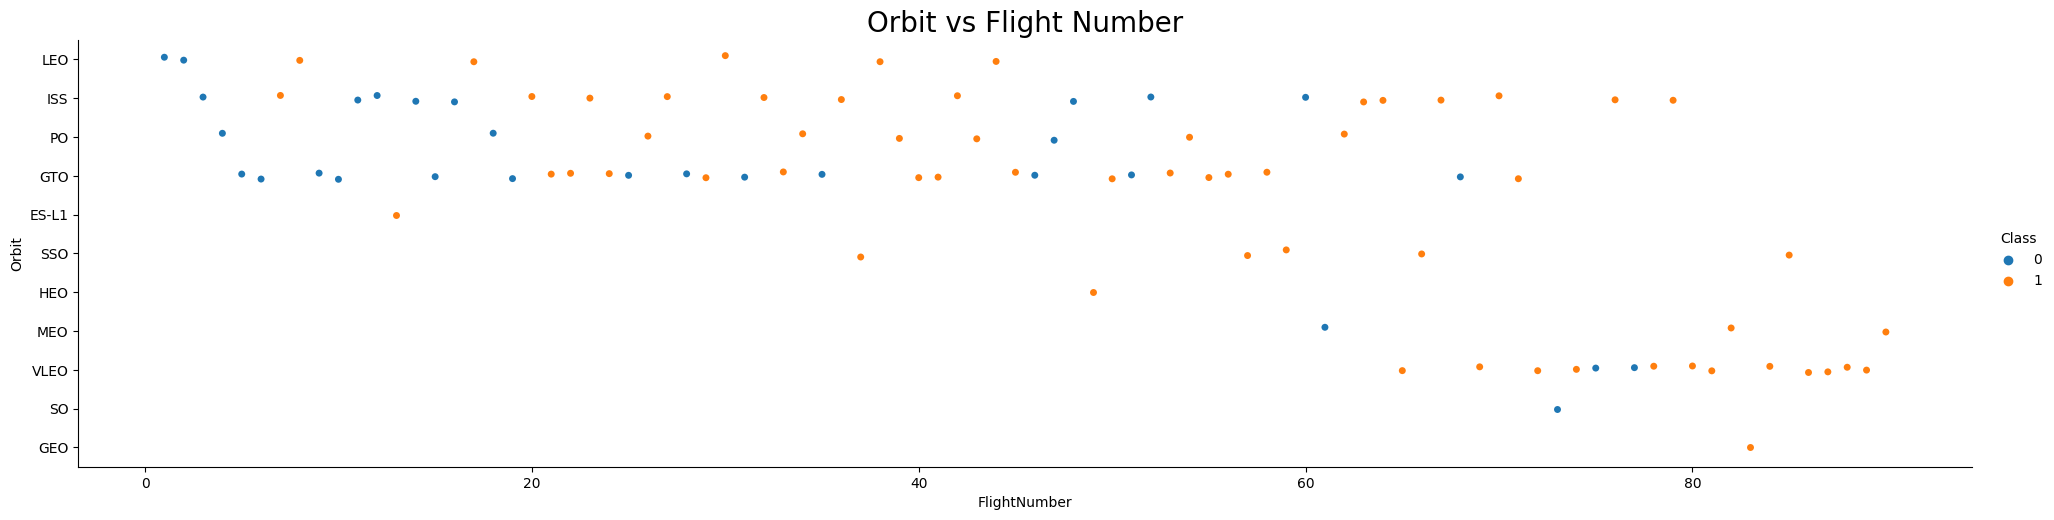

In [12]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, legend='full', aspect=4)
plt.title("Orbit vs Flight Number", fontsize=20)
plt.show()

#### Observation:
We can see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualizing the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


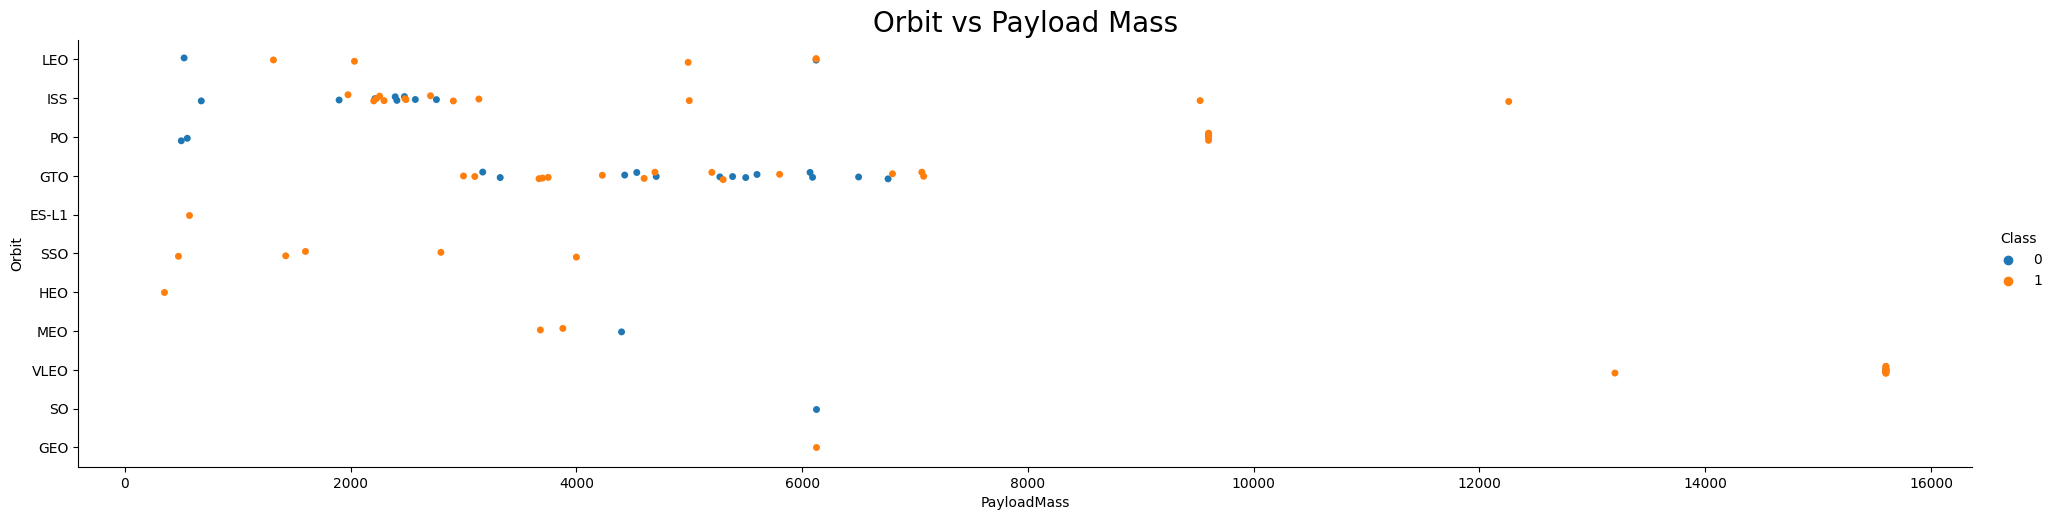

In [13]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, legend='full', aspect=4)
plt.title("Orbit vs Payload Mass", fontsize=20)
plt.show()

#### Observations:
* With heavy payloads the successful landing or positive landing rate are more for PO, LEO and ISS orbits.

* However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualizing the launch success yearly trend


We can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function is to extract the year from the date:


In [14]:
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [15]:
year = []
df['Year'] = Extract_year(df['Date'])
dfyear = df[['Year', 'Class']].groupby(['Year'], as_index=False).mean()
dfyear

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


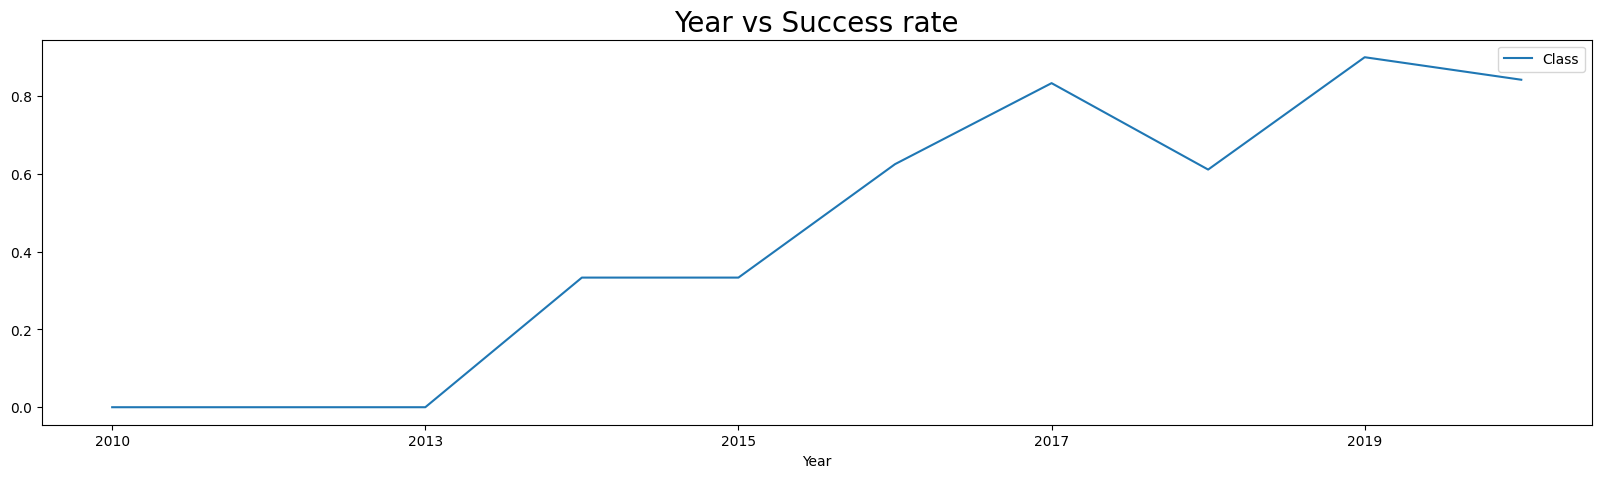

In [16]:
dfyear.plot(kind='line', x='Year', y='Class', figsize=(20, 5))
plt.title("Year vs Success rate", fontsize=20)
plt.show()

#### Observations:
* the sucess rate since 2013 kept increasing till 2020
* 2010-2013 had no success rate


## Features Engineering


By now, we have some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Creating dummy variables of categorical columns


Using the function <code>get_dummies</code> and <code>features</code> dataframe, we apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>.


In [18]:
features_one_hot= pd.get_dummies(data= features, columns= ['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TASK  8: Casting all numeric columns to `float64`
This is to ensure that all the columns are of the same type, adn working with data is easier in later stages of the project.

In [19]:
#Checking the initial datatypes
features_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056      uint8
Serial_B1058      uint8
Serial_B1059      uint8
Serial_B1060      uint8
Serial_B1062      uint8
Length: 80, dtype: object

In [20]:
#converting to datatypes
features_one_hot = features_one_hot.astype(float)

In [21]:
# checkiiing if everything has been converted or not
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

We can now export it to a <b>CSV</b> for the next section


In [22]:
features_one_hot.to_csv('datasets\dataset_part_3.csv', index=False)